### Problem 1
Create any multiple linear model. For example, it may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you do not understand, just use the `random.rand` function. 


In [ ]:
### your solution

import pandas as pd
import numpy as np

coeff = pd.DataFrame(columns=[["x1", "x2"]])

numtrials = 100
r2sum = 0

for i in range(0, numtrials): 
    arrx1 = pd.DataFrame(1000 * np.random.rand(30, 1) + 1000)
    arrx1.columns=["X1"]
    arrx2 = pd.DataFrame(5000 * np.random.rand(30, 1))
    arrx2.columns=["X2"]
    beta = [3, 5]
    
    arrx = arrx1.join(arrx2)
    arry = np.dot(arrx, beta) + (np.random.rand() * 5000)
    
    from sklearn import linear_model
    ols = linear_model.LinearRegression()
    
    ols.fit(arrx, arry)
    coeff.loc[i] = ols.coef_
    r2sum += ols.score(arrx, arry)
    
sums = coeff.sum()
means = sums/numtrials
r2sum = r2sum/numtrials
variance = ((coeff - means)**2).sum() / (numtrials-1)




### Problem 2
This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of mpg? How to explain it?
    - (b) What is the coefficient of determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.

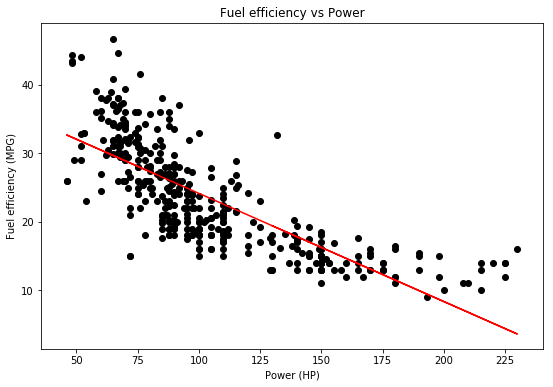

39.93586102117047
[-0.15784473]
0.6059482578894348


In [8]:
### your solution
##code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

autos = pd.read_csv('data/Auto.csv')
mpg = autos["mpg"]
hp = autos["horsepower"].values.reshape(-1, 1)

from sklearn import linear_model

ols = linear_model.LinearRegression()

ols.fit(hp, mpg)

plt.figure(figsize = (9, 6))
plt.title('Fuel efficiency vs Power')
plt.plot(hp, ols.predict(hp), c='r', lw=1.5, label="Predicted relation")
plt.scatter(hp, mpg, c='k')
plt.xlabel('Power (HP)')
plt.ylabel('Fuel efficiency (MPG)')
plt.show()

print(ols.intercept_)
print(ols.coef_)
print(ols.score(hp, mpg))

##a
##The coefficient of MPG is -0.15784
##This means for each additional horsepower an engine has the predicted MPG goes down by 0.15784473MPG.

##b
##The coefficient of determination (R^2) is 0.60595, meaning that ~60% of the variance in MPG can be explained by the model

##c
##The formula is MPG = 39.93586 - (0.15784 * HP)

##d
##Predicted MPG for 98 HP is ~24.5

##e
##in code above

### Problem 3
Without using the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the coefficient of determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [ ]:
### your solution

